In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### In the given graph, we have 30 data points

#### we will try to immitate the data

In [2]:
df = pd.DataFrame()
project_values =    [0,10, 100,  110, 120, 130, 120, 130, 130, 140, 140, 145, 145, 150, 150, 150, 155, 160, 165, 165, 165, 165, 180, 180, 180, 190, 195,200,240]
percentage_values = [0,80, 75,  84,   73,  71,   82,  20, 81,   86,  72, 74,  72,   66,  67,  66,  55,  87,  57,  65,  71,  86,  65,  71,  86,  73,  67, 73, 76]
df.insert(loc=0, column = 'projects', value=project_values)
df.insert(loc=1, column = 'percentage', value=percentage_values)

In [3]:
df

,projects,percentage
0,0,0
1,10,80
2,100,75
3,110,84
4,120,73
5,130,71
6,120,82
7,130,20
8,130,81
9,140,86


#### Add the percentage of processed projects

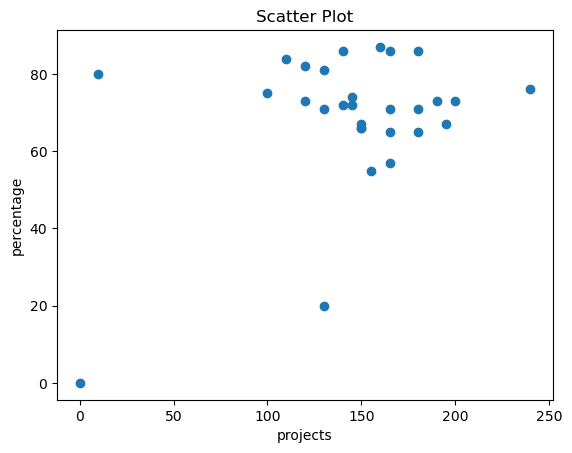

In [4]:
plt.scatter(df['projects'], df['percentage'])

# set labels and title
plt.xlabel('projects')
plt.ylabel('percentage')
plt.title('Scatter Plot')

# display plot
plt.show()

### polynomial regression is not working
### from the data it is visible that its highly dispersed and non-linear, also I am not aware as to which kind of projects are failing, this might help find a feature that is more correlated to failure of projects

### By seeing the distribution, we have options for non-linear regression model - spline and 
### non-parametric model KNN which doesn't assume any relationship between dependent and independent variable



## I will try to scale up my dataset based on these small set of values and run KNN and spline to get an idea on which model is better but again data understanding is important

In [5]:
df_new = pd.DataFrame()
project_values_new =    [0,10, 100,  110, 120, 130, 120, 130, 130, 140, 140, 145, 145, 150, 150, 150, 155, 160, 165, 165, 165, 165, 180, 180, 180, 190, 195,200,240, 120, 130, 130, 140, 140, 145, 145, 150, 150, 150, 155, 160, 165, 165, 165, 110, 120, 130, 120, 130, 130, 140, 140, 145, 145, 150, 150, 150, 155, 160, 165, 165, 165, 165, 180]
percentage_values_new = [0,80, 75,  84,   73,  71,   82,  20, 81,   86,  72, 74,  72,   66,  67,  66,  55,  87,  57,  65,  71,  86,  65,  71,  86,  73,  67, 73, 76, 72, 74,  72,   66,  67,  66,  55,  87,  57,  65,  71,  86,  65,  71,  86,84,   73,  71,   82,  20, 81,   86,  72, 74,  72,   66,  67,  66,  55,  87,  57,  65,  71,  86,  65]
df_new.insert(loc=0, column = 'projects', value=project_values_new)
df_new.insert(loc=1, column = 'percentage', value=percentage_values_new)

In [6]:
df_new

,projects,percentage
0,0,0
1,10,80
2,100,75
3,110,84
4,120,73
...,...,...
59,165,57
60,165,65
61,165,71
62,165,86


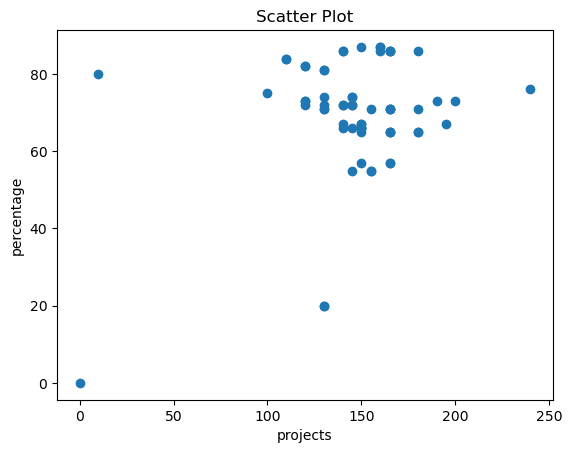

In [7]:
plt.scatter(df_new['projects'], df_new['percentage'])

# set labels and title
plt.xlabel('projects')
plt.ylabel('percentage')
plt.title('Scatter Plot')

# display plot
plt.show()

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [9]:
knn = KNeighborsRegressor(n_neighbors=10)

In [10]:
X_train = df_new['projects'].values.reshape(-1,1)
y_train = df_new['percentage'].values.reshape(-1,1)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [11]:
df_test = pd.DataFrame()
project_values_test =    [10, 150, 150, 150, 155]
percentage_values_test = [80, 75,  84,   73,  71]
df_test.insert(loc=0, column = 'projects', value=project_values_test)
df_test.insert(loc=1, column = 'percentage', value=percentage_values_test)

In [12]:
df_test

,projects,percentage
0,10,80
1,150,75
2,150,84
3,150,73
4,155,71


In [13]:
X_test = df_test['projects'].values.reshape(-1,1)
y_actual = df_test['percentage'].values.reshape(-1,1)
# make predictions on test set
y_pred = knn.predict(X_test.reshape(-1, 1))

In [14]:
accuracy = knn.score(X_test, y_actual)

In [15]:
accuracy

-2.864310954063602

In [16]:
df_predictions = pd.DataFrame()
df_predictions.insert(loc=0, column = 'y_actual', value=df_test['percentage'])
df_predictions.insert(loc=1, column = 'y_pred', value=y_pred)

In [17]:
df_predictions

,y_actual,y_pred
0,80,70.5
1,75,67.9
2,84,67.9
3,73,67.9
4,71,67.6


### Polynomial regression

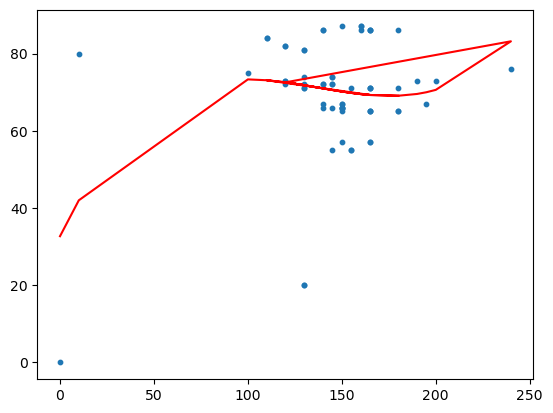

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

# Plot the data and the polynomial fit
plt.scatter(df_new['projects'], df_new['percentage'], s=10)
plt.plot(df_new['projects'], poly_model.predict(poly.fit_transform(X_train)), color='r')
plt.show()

### Spline regression

In [19]:
from sklearn.preprocessing import SplineTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

spline = SplineTransformer(n_knots=1, include_bias=False)

# Create a pipeline for spline regression
spline_model = make_pipeline(SplineTransformer(n_knots=5), LinearRegression())

# Fit the model on the training data
spline_model.fit(X_train, y_train)

# Predict on the test data
y_pred = spline_model.predict(X_test)

mse = mean_squared_error(y_actual, y_pred)

In [20]:
y_pred

array([[79.78150153],
       [69.23286868],
       [69.23286868],
       [69.23286868],
       [70.10559116]])

In [21]:
mse

53.27339159939454

In [22]:
y_actual

array([[80],
       [75],
       [84],
       [73],
       [71]], dtype=int64)